### William Miller
### ECGR4105
### Assignment 2
### Due: 3/31/25

# Problem 1a

In [ ]:
# IMPORT NECESSARY LIBRARIES
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# IMPORT EXCEL DATA INTO DATAFRAME
file_path = '/content/drive/My Drive/ECGR4105/Housing.csv'
df = pd.read_csv(file_path)
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
# ISOLATE DESIRED FEATURES FOR PROBLEM 1a
# FEATURES: AREA, BEDROOMS, BATHROOMS, STORIES, PARKING
featuresForA = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
NUM_FEATURES_A = len(featuresForA)
X_1a = df[featuresForA]
print(X_1a.head())

# ISOLATE TARGET VARIABLE
y_1a = df['price']
print(y_1a.head())

   area  bedrooms  bathrooms  stories  parking
0  7420         4          2        3        2
1  8960         4          4        4        3
2  9960         3          2        2        2
3  7500         4          2        2        3
4  7420         4          1        2        2
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


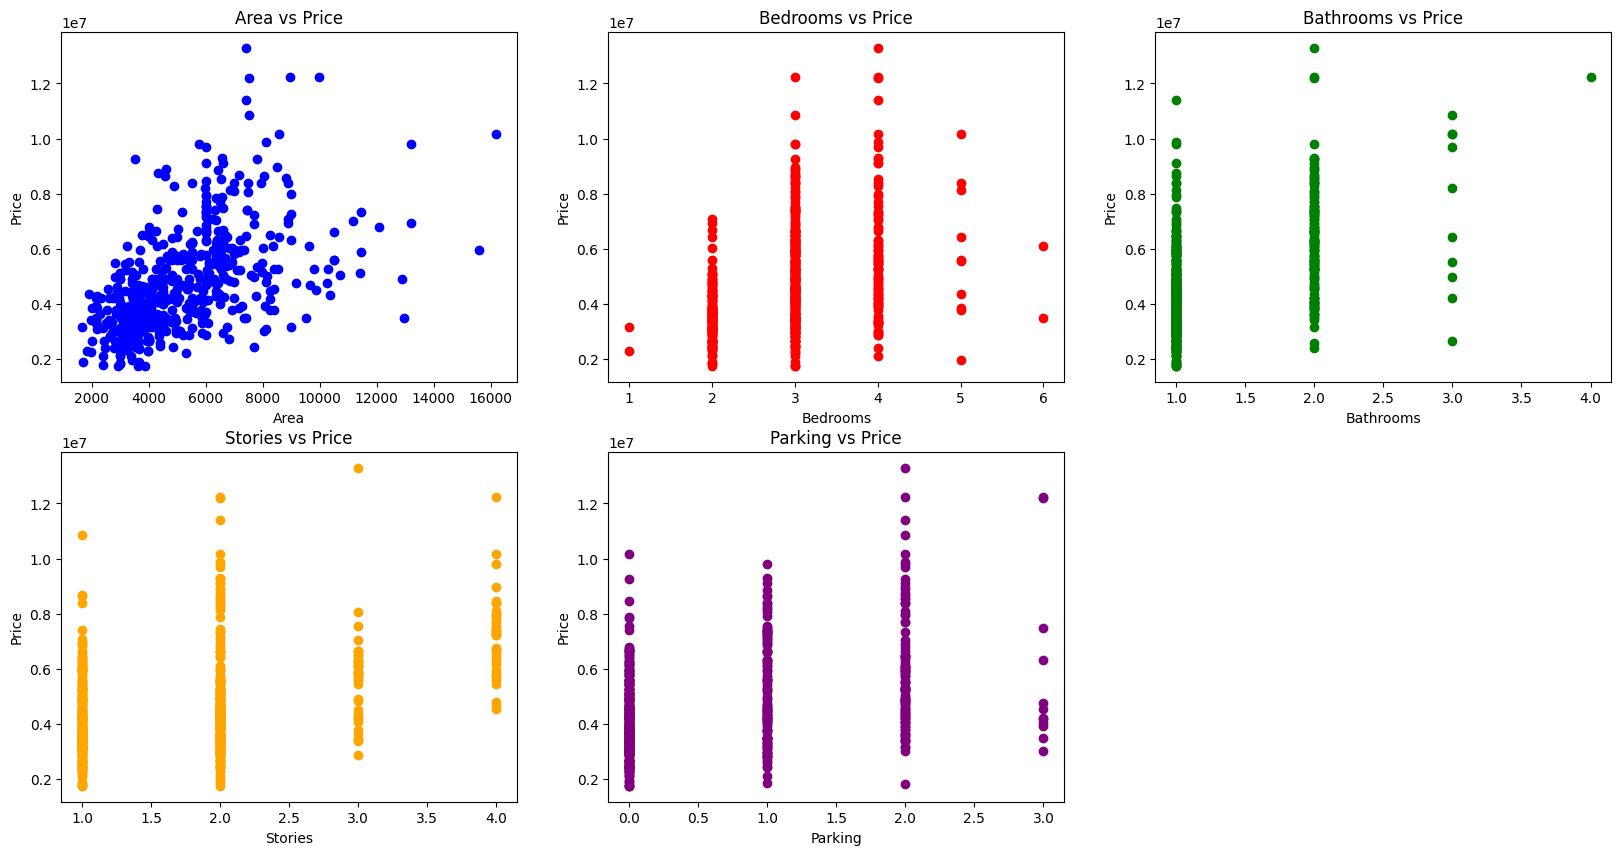

In [ ]:
# VISUALIZE DATA
plt.figure
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.scatter(X_1a['area'], y_1a, color='blue', label='Area')
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')

plt.subplot(2,3,2)
plt.scatter(X_1a['bedrooms'], y_1a, color='red', label='Bedrooms')
plt.title('Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

plt.subplot(2,3,3)
plt.scatter(X_1a['bathrooms'], y_1a, color='green', label='Bathrooms')
plt.title('Bathrooms vs Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')

plt.subplot(2,3,4)
plt.scatter(X_1a['stories'], y_1a, color='orange', label='Stories')
plt.title('Stories vs Price')
plt.xlabel('Stories')
plt.ylabel('Price')

plt.subplot(2,3,5)
plt.scatter(X_1a['parking'], y_1a, color='purple', label='Parking')
plt.title('Parking vs Price')
plt.xlabel('Parking')
plt.ylabel('Price')

plt.show()


In [ ]:
# SPLIT DATA INTO TRAINING AND VALIDATION SET
X_train, X_test, y_train, y_test = train_test_split(X_1a, y_1a, test_size=0.2, random_state=0)

In [ ]:
# ADD INTERCEPT (BIAS) COLUMN TO FEATURE DATA
X_train.insert(0, 'bias', 1)
X_test.insert(0, 'bias', 1)
display(X_train)

,bias,area,bedrooms,bathrooms,stories,parking
542,1,3620,2,1,1,0
496,1,4000,2,1,1,0
484,1,3040,2,1,1,0
507,1,3600,2,1,1,0
252,1,9860,3,1,1,0
...,...,...,...,...,...,...
70,1,4000,3,2,2,0
277,1,10360,2,1,1,1
9,1,5750,3,2,4,1
359,1,3600,3,1,1,1


In [ ]:
# CREATE COST FUNCTION
def Compute_Cost(x, y, theta):
  m = len(x) # numObservations
  predictions = x.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  cost = 1/(2*m) * np.sum(sqrErrors, axis=0)
  return cost

In [ ]:
# CREATE GRADIENT DESCENT FUNCTION
def Gradient_Descent(x, y, theta, alpha, iterations):
  m = len(x) # numObservations
  costHistory = np.zeros(iterations)

  for i in range(iterations):
    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sumDelta = (alpha / m) * x.transpose().dot(errors)
    theta = theta - sumDelta
    costHistory[i] = Compute_Cost(x, y, theta)
    if np.isnan(costHistory[i]):
      print(f"NaN detected at iteration {i}")
      break

  return theta, costHistory

In [ ]:
# CONVERT DATAFRAMES TO NUMPY ARRAYS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# CREATE NUMPY ARRAY FOR PARAMETERS
thetas = np.zeros(NUM_FEATURES_A + 1) # +1 for bias column

# VALIDATE VISUALLY
display(X_train)
display(thetas)

array([[   1, 3620,    2,    1,    1,    0],
       [   1, 4000,    2,    1,    1,    0],
       [   1, 3040,    2,    1,    1,    0],
       ...,
       [   1, 5750,    3,    2,    4,    1],
       [   1, 3600,    3,    1,    1,    1],
       [   1, 6600,    3,    1,    1,    0]])

array([0., 0., 0., 0., 0., 0.])

In [ ]:
# RESHAPE INTO COLUMN VECTORS
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
thetas = thetas.reshape(-1,1)

<ipython-input-413-7faef4521ba2>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  costHistory[i] = Compute_Cost(x, y, theta)


Final value of parameters =  [[1.70745581e-01]
 [8.24503290e+02]
 [5.44775811e-01]
 [2.54685654e-01]
 [3.68235049e-01]
 [1.47526161e-01]]


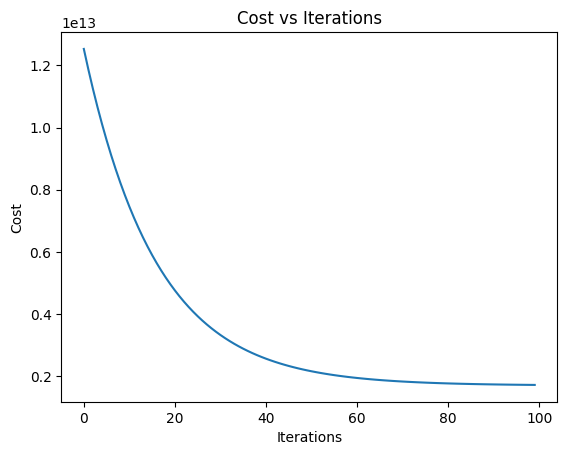

In [ ]:
# PERFORM GRADIENT DESCENT
ALPHA = 0.000000001
ITERATIONS = 100
thetas, costHistory = Gradient_Descent(X_train, y_train, thetas, ALPHA, ITERATIONS)
print('Final value of parameters = ', thetas)
#print('costHistory = ', costHistory)

# DISPLAY PLOT OF COST VS ITERATIONS FOR ALPHA AND ITERATIONS ANALYSIS
plt.plot(costHistory)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

Test set cost: [1.54144341e+12]


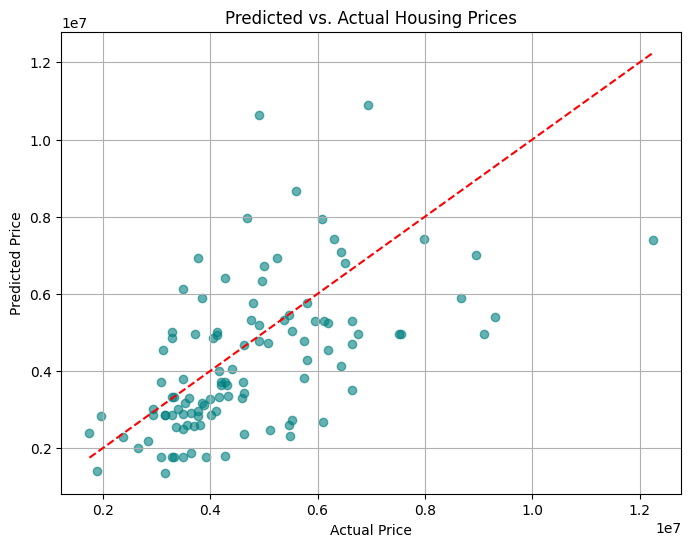

In [ ]:
# TEST ON VALIDATION DATA
y_pred = X_test.dot(thetas)
test_cost = Compute_Cost(X_test, y_test, thetas) # This gives final cost, not a history of it
print("Test set cost:", test_cost)

# VISUALIZE PERFORMANCE
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') # Dashed red line is a perfect prediction
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs. Actual Housing Prices')
plt.grid(True)
plt.show()


In [ ]:
# FUNCTION TO GET PLOTTABLE COST HISTORY OF TEST DATA USED TO VALIDATE TRAINED MODEL
# Must be done inside of a gradient descent algorithm in order to have a history of cost, not just final
def Gradient_Descent_With_Validation(x_train, y_train, x_val, y_val, theta, alpha, iterations):
    m = len(x_train)
    trainCostHistory = np.zeros(iterations)
    testCostHistory = np.zeros(iterations)

    for i in range(iterations):
        predictions = x_train.dot(theta)
        errors = predictions - y_train
        sumDelta = (alpha / m) * x_train.transpose().dot(errors)
        theta = theta - sumDelta

        trainCostHistory[i] = Compute_Cost(x_train, y_train, theta).item()
        testCostHistory[i] = Compute_Cost(x_val, y_val, theta).item()

    return theta, trainCostHistory, testCostHistory

A properly trained model will have validation cost following the general trend of training cost.
Validation loss increasing while training loss decreases is a sign of overfitting.
Final validation cost for 1a: 1.541e+12


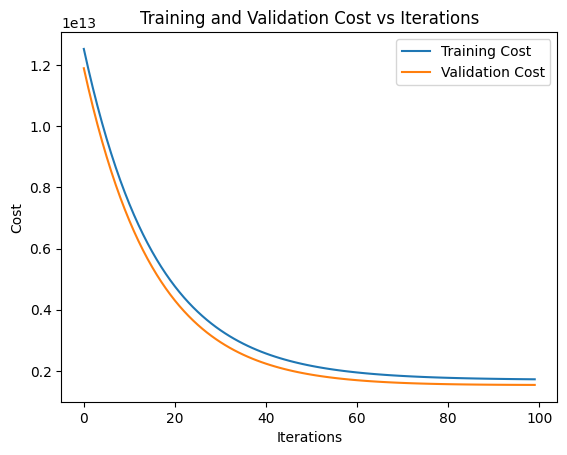

In [ ]:
# ACQUIRE testCostHistory AND PLOT ALONGSIDE TRAINING COST HISTORY
thetasOld = thetas.copy()
thetas = np.zeros(NUM_FEATURES_A + 1) # +1 for bias column
thetas = thetas.reshape(-1,1)
thetas, trainCostHistory, testCostHistory = Gradient_Descent_With_Validation(X_train, y_train, X_test, y_test, thetas, ALPHA, ITERATIONS)

# To check if there was a change in theta values between Gradient_Descent() and Gradient_Descent_With_Validation()
# No output --> No change
for i in range(len(thetas)):
  if(thetas[i] != thetasOld[i]):
    print("Change in thetas[", i, "]")

plt.plot(trainCostHistory, label='Training Cost')
plt.plot(testCostHistory, label='Validation Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Cost vs Iterations')
plt.legend()
print('A properly trained model will have validation cost following the general trend of training cost.\nValidation loss increasing while training loss decreases is a sign of overfitting.')
print("Final validation cost for 1a: {:.3e}".format(testCostHistory[ITERATIONS - 1]))

# Problem 1b

In [ ]:
# ISOLATE DESIRED FEATURES FOR PROBLEM 1b
# FEATURES: AREA, BEDROOMS, BATHROOMS, STORIES, MAIN ROAD, GUESTROOM, BASEMENT, HOT WATER HEATING, AIR CONDITIONING, PARKING, PREFAREA
featuresForB = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
NUM_FEATURES_B = len(featuresForB)
X_1b = df[featuresForB]
X_1b = X_1b.replace({'yes': 1, 'no': 0})
print(X_1b.head())


# ISOLATE TARGET VARIABLE
y_1b = df['price']
print(y_1b.head())

   area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  
0                0                1        2         1  
1                0                1        3         0  
2                0                0        2         1  
3                0                1        3         1  
4                0                1        2         0  
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


<ipython-input-420-51c5e27d9812>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_1b = X_1b.replace({'yes': 1, 'no': 0})


([<matplotlib.axis.XTick at 0x7e2bb77be090>,
 [Text(0, 0, 'no'), Text(1, 0, 'yes')])

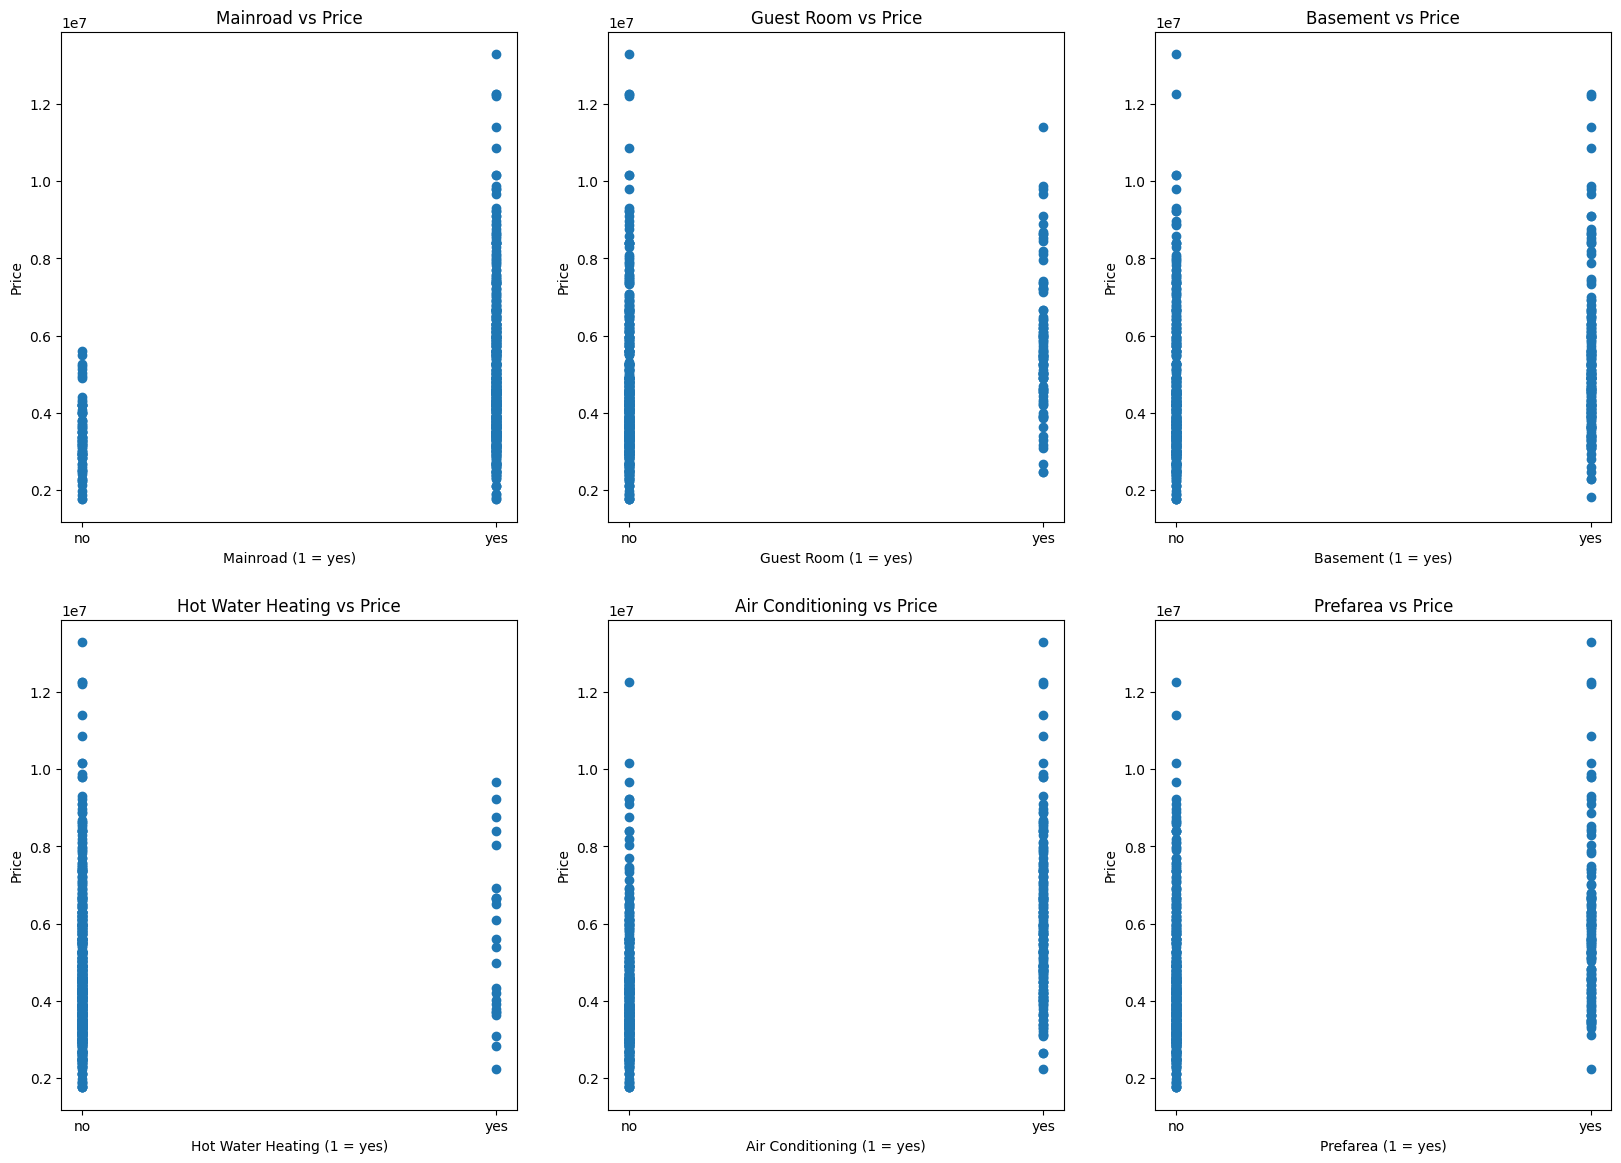

In [ ]:
# VISUALIZE DATA FOR NEW FEATURES BEING CONSIDERED
plt.figure
plt.figure(figsize=(20,14))

plt.subplot(2,3,1)
plt.scatter(X_1b['mainroad'], y_1b)
plt.title('Mainroad vs Price')
plt.xlabel('Mainroad (1 = yes)')
plt.ylabel('Price')
plt.xticks([0, 1], ['no', 'yes'])

plt.subplot(2,3,2)
plt.scatter(X_1b['guestroom'], y_1b)
plt.title('Guest Room vs Price')
plt.xlabel('Guest Room (1 = yes)')
plt.ylabel('Price')
plt.xticks([0, 1], ['no', 'yes'])

plt.subplot(2,3,3)
plt.scatter(X_1b['basement'], y_1b)
plt.title('Basement vs Price')
plt.xlabel('Basement (1 = yes)')
plt.ylabel('Price')
plt.xticks([0, 1], ['no', 'yes'])

plt.subplot(2,3,4)
plt.scatter(X_1b['hotwaterheating'], y_1b)
plt.title('Hot Water Heating vs Price')
plt.xlabel('Hot Water Heating (1 = yes)')
plt.ylabel('Price')
plt.xticks([0, 1], ['no', 'yes'])

plt.subplot(2,3,5)
plt.scatter(X_1b['airconditioning'], y_1b)
plt.title('Air Conditioning vs Price')
plt.xlabel('Air Conditioning (1 = yes)')
plt.ylabel('Price')
plt.xticks([0, 1], ['no', 'yes'])

plt.subplot(2,3,6)
plt.scatter(X_1b['prefarea'], y_1b)
plt.title('Prefarea vs Price')
plt.xlabel('Prefarea (1 = yes)')
plt.ylabel('Price')
plt.xticks([0, 1], ['no', 'yes'])

In [ ]:
# SPLIT DATA INTO TRAINING AND VALIDATION SET
X_train, X_test, y_train, y_test = train_test_split(X_1b, y_1b, test_size=0.2, random_state=0)

# ADD INTERCEPT (BIAS) COLUMN TO FEATURE DATA
X_train.insert(0, 'bias', 1)
X_test.insert(0, 'bias', 1)
display(X_train) # Verify bias column added correctly

,bias,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,1,3620,2,1,1,1,0,0,0,0,0,0
496,1,4000,2,1,1,1,0,0,0,0,0,0
484,1,3040,2,1,1,0,0,0,0,0,0,0
507,1,3600,2,1,1,1,0,0,0,0,0,0
252,1,9860,3,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
70,1,4000,3,2,2,1,0,1,0,1,0,1
277,1,10360,2,1,1,1,0,0,0,0,1,1
9,1,5750,3,2,4,1,1,0,0,1,1,1
359,1,3600,3,1,1,1,0,0,0,0,1,0


In [ ]:
# CONVERT DATAFRAMES TO NUMPY ARRAYS
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# CREATE NUMPY ARRAY FOR PARAMETERS
thetas = np.zeros(NUM_FEATURES_B + 1) # +1 for bias column

# VALIDATE VISUALLY
display(X_train)
display(thetas)

# RESHAPE INTO COLUMN VECTORS
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
thetas = thetas.reshape(-1,1)

array([[   1, 3620,    2, ...,    0,    0,    0],
       [   1, 4000,    2, ...,    0,    0,    0],
       [   1, 3040,    2, ...,    0,    0,    0],
       ...,
       [   1, 5750,    3, ...,    1,    1,    1],
       [   1, 3600,    3, ...,    0,    1,    0],
       [   1, 6600,    3, ...,    0,    0,    1]])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Final value of parameters =  [[4.84515666e-01]
 [8.61029265e+02]
 [1.76411452e+00]
 [9.38445033e-01]
 [1.42323647e+00]
 [4.39010911e-01]
 [1.88683399e-01]
 [3.10159120e-01]
 [7.54249263e-02]
 [3.59421025e-01]
 [4.51779088e-01]
 [2.04324692e-01]]
Final cost =  1704609852341.0972


<ipython-input-413-7faef4521ba2>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  costHistory[i] = Compute_Cost(x, y, theta)


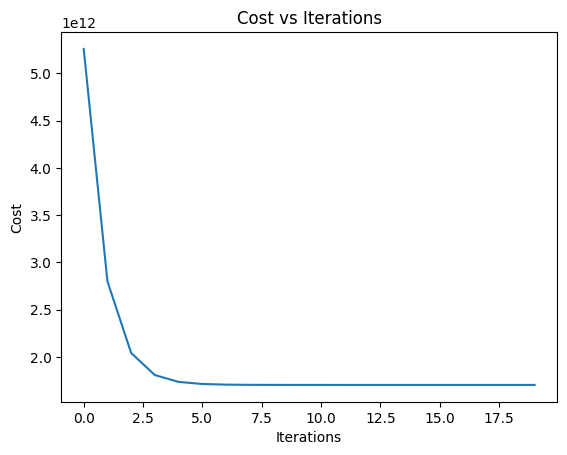

In [ ]:
# PERFORM GRADIENT DESCENT
ALPHA = 0.00000005
ITERATIONS = 20
thetas, costHistory = Gradient_Descent(X_train, y_train, thetas, ALPHA, ITERATIONS)
print('Final value of parameters = ', thetas)
print('Final cost = ', costHistory[ITERATIONS-1])

# DISPLAY PLOT OF COST VS ITERATIONS FOR ALPHA AND ITERATIONS ANALYSIS
plt.plot(costHistory)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

Test set cost: [1.55065386e+12]


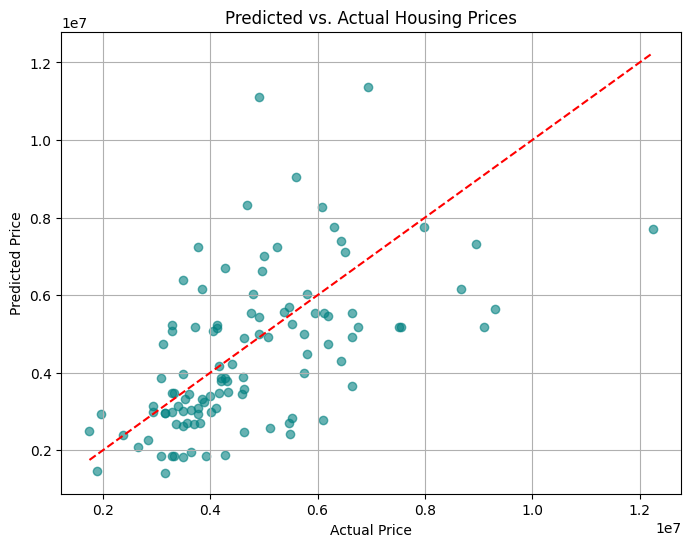

In [ ]:
# TEST ON VALIDATION DATA
y_pred = X_test.dot(thetas)
test_cost = Compute_Cost(X_test, y_test, thetas) # This gives final cost, not a history of it
print("Test set cost:", test_cost)

# VISUALIZE PERFORMANCE
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') # Dashed red line is a perfect prediction
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs. Actual Housing Prices')
plt.grid(True)
plt.show()


A properly trained model will have validation cost following the general trend of training cost.
Validation loss increasing while training loss decreases is a sign of overfitting.
Final validation cost for 1a: 1.551e+12


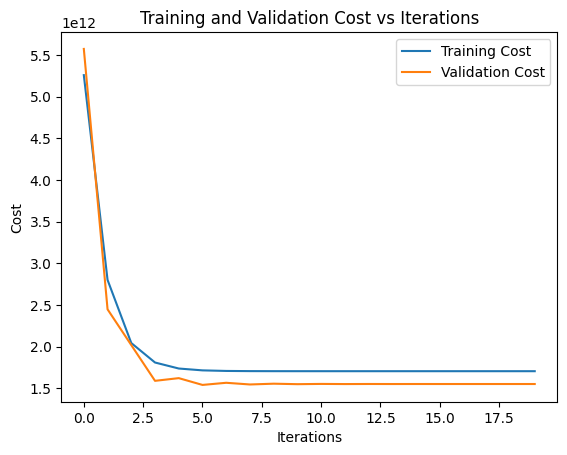

In [ ]:
# ACQUIRE testCostHistory AND PLOT ALONGSIDE TRAINING COST HISTORY
thetasOld = thetas.copy()
thetas = np.zeros(NUM_FEATURES_B + 1) # +1 for bias column
thetas = thetas.reshape(-1,1)
thetas, trainCostHistory, testCostHistory = Gradient_Descent_With_Validation(X_train, y_train, X_test, y_test, thetas, ALPHA, ITERATIONS)

# To check if there was a change in theta values between Gradient_Descent() and Gradient_Descent_With_Validation()
# No output --> No change
for i in range(len(thetas)):
  if(thetas[i] != thetasOld[i]):
    print("Change in thetas[", i, "]")

plt.plot(trainCostHistory, label='Training Cost')
plt.plot(testCostHistory, label='Validation Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training and Validation Cost vs Iterations')
plt.legend()
print('A properly trained model will have validation cost following the general trend of training cost.\nValidation loss increasing while training loss decreases is a sign of overfitting.')
print("Final validation cost for 1a: {:.3e}".format(testCostHistory[ITERATIONS - 1]))

# Problem 2a

In [ ]:
# ISOLATE DESIRED FEATURES FOR PROBLEM 2a
# FEATURES: AREA, BEDROOMS, BATHROOMS, STORIES, PARKING
X_2a = df[featuresForA]

# ISOLATE TARGET VARIABLE
y_2a = df['price']

# SPLIT DATA INTO TRAINING AND VALIDATION SET
X_train, X_test, y_train, y_test = train_test_split(X_2a, y_2a, test_size=0.2, random_state=0)

In [ ]:
# IMPORT LIBRARIES FOR NORMALIZATION AND STANDARDIZATION
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# CREATE SCALER OBJECTS
normalScaler = MinMaxScaler()
standardScaler = StandardScaler()

# DISPLAY X_train df FOR VERIFICATION
#display(X_train)

# NORMALIZE DATA (RETURNS NP ARRAY)
normalScaler.fit(X_train)
normalX_train = normalScaler.transform(X_train)
normalX_test = normalScaler.transform(X_test)

# STANDARDIZE DATA (RETURNS NP ARRAY)
standardScaler.fit(X_train)
stdX_train = standardScaler.transform(X_train)
stdX_test = standardScaler.transform(X_test)

# CONVERT BACK TO DATAFRAME TO ADD BIAS COLUMN
normalX_train = pd.DataFrame(normalX_train, columns=X_train.columns)
normalX_test = pd.DataFrame(normalX_test, columns=X_test.columns)
stdX_train = pd.DataFrame(stdX_train, columns=X_train.columns)
stdX_test = pd.DataFrame(stdX_test, columns=X_test.columns)

# ADD INTERCEPT (BIAS) COLUMN TO FEATURE DATA
normalX_train.insert(0, 'bias', 1)
normalX_test.insert(0, 'bias', 1)
stdX_train.insert(0, 'bias', 1)
stdX_test.insert(0, 'bias', 1)
#print("Normalized [0, 1] X_train")
#display(normalX_train)
#print("Standardized (mean = 0, std = 1) X_train")
#display(stdX_test)

# CONVERT BACK TO NP ARRAYS
normalX_train = np.array(normalX_train)
normalX_test = np.array(normalX_test)
stdX_train = np.array(stdX_train)
stdX_test = np.array(stdX_test)
#display(normalX_train)

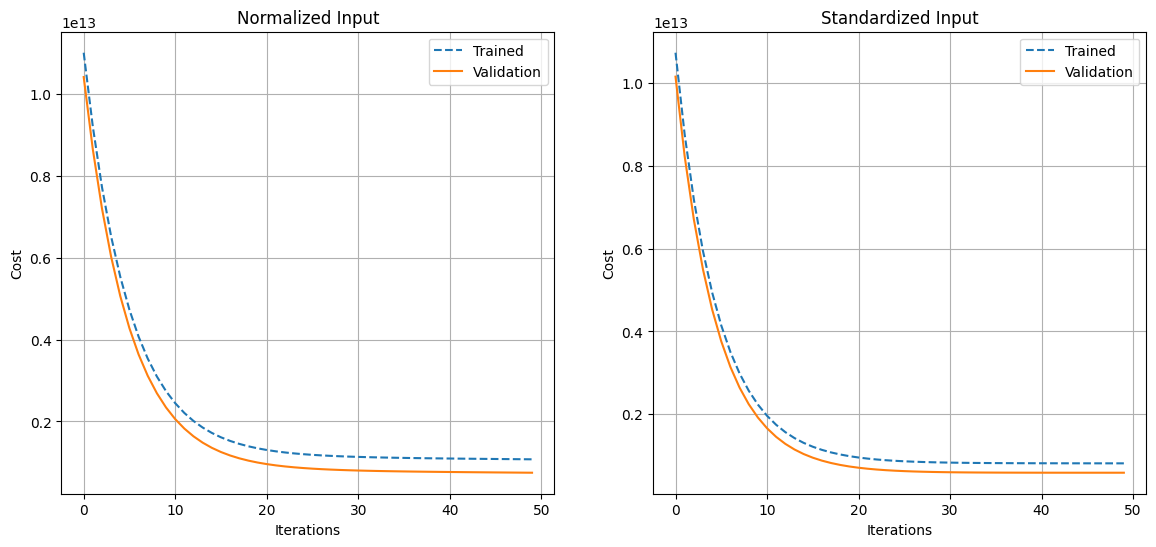

Final validation cost for normalization: 7.472e+11
Final validation cost for standardization: 5.867e+11
Normalization cost was higher than standardization by: 1.605e+11
Normalized - Training Cost: 1.075e+12, Validation Cost: 7.472e+11, Difference: 3.280e+11
Standardized - Training Cost: 8.134e+11, Validation Cost: 5.867e+11, Difference: 2.267e+11


In [ ]:
# CREATE THETAS
thetas = np.zeros(NUM_FEATURES_A + 1) # +1 for bias column
thetas = thetas.reshape(-1,1)
normThetas = thetas.copy()
stdThetas = thetas.copy()

# RESHAPE INTO NP ARRAY COLUMN VECTORS
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

# DEFINE ALPHA AND ITERATIONS
NORM_ALPHA = 0.07
NORM_ITERATIONS = 50
STD_ALPHA = 0.1
STD_ITERATIONS = 50

# TRAIN MODELS
normThetas, normCostHistory, validationCostForNorm = Gradient_Descent_With_Validation(normalX_train, y_train, normalX_test, y_test, normThetas, NORM_ALPHA, NORM_ITERATIONS)
stdThetas, stdCostHistory, validationCostForStd = Gradient_Descent_With_Validation(stdX_train, y_train, stdX_test, y_test, stdThetas, STD_ALPHA, STD_ITERATIONS)

# PLOT VALIDATION OF BOTH TRIALS (NORMALIZED AND STANDARDIZED) SIDE BY SIDE
plt.figure(figsize=(14, 6))

# NORMALIZATION
plt.subplot(1, 2, 1)
plt.plot(normCostHistory, label='Trained', linestyle='--')
plt.plot(validationCostForNorm, label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Normalized Input')
plt.legend()
plt.grid(True)

# STANDARDIZATION
plt.subplot(1, 2, 2)
plt.plot(stdCostHistory, label='Trained', linestyle='--')
plt.plot(validationCostForStd, label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Standardized Input')
plt.legend()
plt.grid(True)

plt.show()

# FORMAT AND DISPLAY FINAL VALIDATION COSTS IN SCIENTIFIC NOTATION
print("Final validation cost for normalization: {:.3e}".format(validationCostForNorm[NORM_ITERATIONS - 1]))
print("Final validation cost for standardization: {:.3e}".format(validationCostForStd[STD_ITERATIONS - 1]))
print("Normalization cost was higher than standardization by: {:.3e}".format(validationCostForNorm[NORM_ITERATIONS - 1] - validationCostForStd[STD_ITERATIONS - 1]))

# FIND DIFFERENCE IN COST BETWEEN TRAINING AND VALIDATION
# NORMALIZATION
train_final_norm_2 = normCostHistory[NORM_ITERATIONS - 1]
val_final_norm_2 = validationCostForNorm[NORM_ITERATIONS - 1]
print("Normalized - Training Cost: {:.3e}, Validation Cost: {:.3e}, Difference: {:.3e}".format(
    train_final_norm_2, val_final_norm_2, abs(train_final_norm_2 - val_final_norm_2)))

# STANDARDIZATION
train_final_std_2 = stdCostHistory[STD_ITERATIONS - 1]
val_final_std_2 = validationCostForStd[STD_ITERATIONS - 1]
print("Standardized - Training Cost: {:.3e}, Validation Cost: {:.3e}, Difference: {:.3e}".format(
    train_final_std_2, val_final_std_2, abs(train_final_std_2 - val_final_std_2)))

While both normalization and standardization achieved an appropriate convergence, standardization performed slightly better. This was due to the tighter gap between the training and validation loss as well as having a lower overall loss than normalization.

Test set cost: [1.55065386e+12]
Test set cost: [1.55065386e+12]


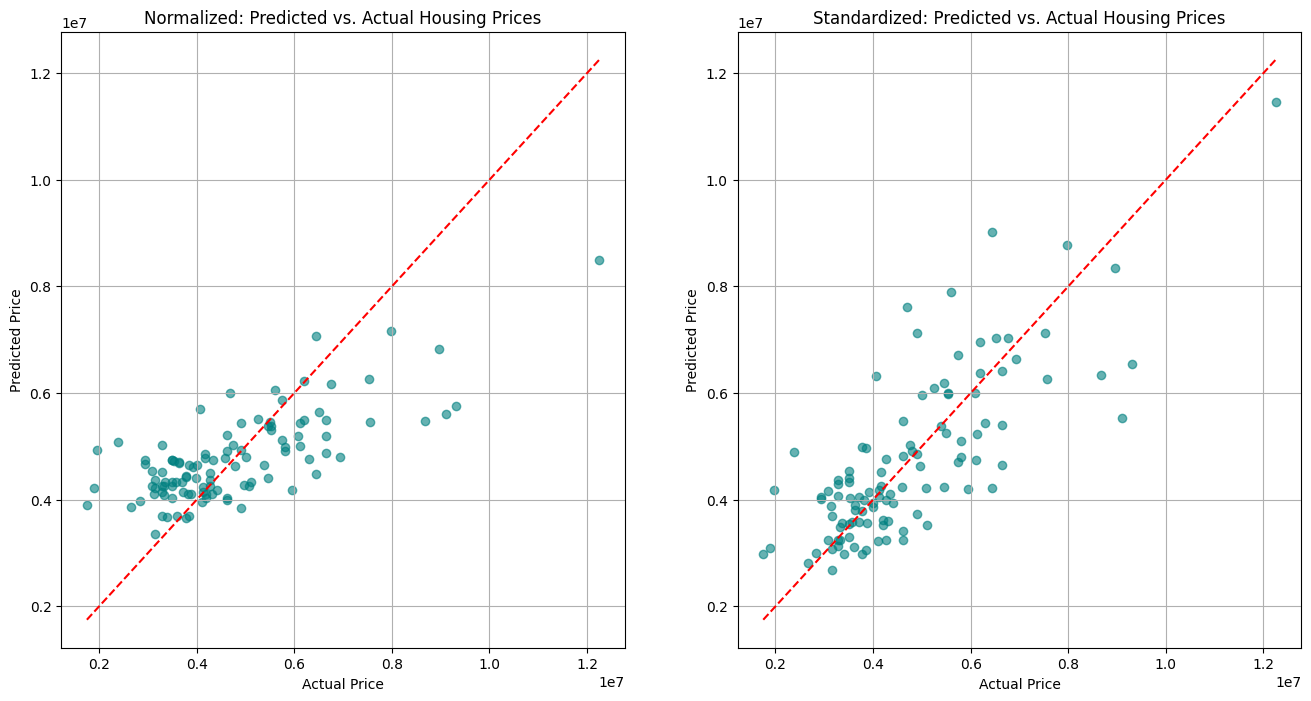

In [ ]:
# TEST ON VALIDATION DATA FOR NORMALIZATION
normY_pred = normalX_test.dot(normThetas)
normTest_cost = Compute_Cost(normalX_test, y_test, normThetas) # This gives final cost, not a history of it
print("Test set cost:", test_cost)

# TEST ON VALIDATION DATA FOR STANDARDIZATION
stdY_pred = stdX_test.dot(stdThetas)
stdTest_cost = Compute_Cost(stdX_test, y_test, stdThetas) # This gives final cost, not a history of it
print("Test set cost:", test_cost)

# VISUALIZE PERFORMANCE FOR NORMALIZATION AND STANDARDIZATION
plt.figure(figsize=(16, 8))

# NORMALIZATION
plt.subplot(1, 2, 1)
plt.scatter(y_test, normY_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Normalized: Predicted vs. Actual Housing Prices')
plt.grid(True)

# STANDARDIZATION
plt.subplot(1, 2, 2)
plt.scatter(y_test, stdY_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Standardized: Predicted vs. Actual Housing Prices')
plt.grid(True)

plt.show()


# Problem 2b

In [ ]:
# ISOLATE DESIRED FEATURES FOR PROBLEM 2b
# FEATURES: AREA, BEDROOMS, BATHROOMS, STORIES, PARKING
X_2b = df[featuresForB]
X_2b = X_2b.replace({'yes': 1, 'no': 0})
#print(X_2b.head())

# ISOLATE TARGET VARIABLE
y_2b = df['price']
#print(y_2b.head())

# SPLIT DATA INTO TRAINING AND VALIDATION SET
X_train, X_test, y_train, y_test = train_test_split(X_2b, y_2b, test_size=0.2, random_state=0)

<ipython-input-431-1df48d6ac13d>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_2b = X_2b.replace({'yes': 1, 'no': 0})


In [ ]:
# CREATE SCALER OBJECTS
normalScaler = MinMaxScaler()
standardScaler = StandardScaler()

# NORMALIZE DATA (RETURNS NP ARRAY)
normalScaler.fit(X_train)
normX_train = normalScaler.transform(X_train)
normX_test = normalScaler.transform(X_test)

# STANDARDIZE DATA (RETURNS NP ARRAY)
standardScaler.fit(X_train)
stdX_train = standardScaler.transform(X_train)
stdX_test = standardScaler.transform(X_test)

# CONVERT BACK TO DATAFRAME TO ADD BIAS COLUMN
normX_train = pd.DataFrame(normX_train, columns=X_train.columns)
normX_test = pd.DataFrame(normX_test, columns=X_test.columns)
stdX_train = pd.DataFrame(stdX_train, columns=X_train.columns)
stdX_test = pd.DataFrame(stdX_test, columns=X_test.columns)

# ADD INTERCEPT (BIAS) COLUMN TO FEATURE DATA
normX_train.insert(0, 'bias', 1)
normX_test.insert(0, 'bias', 1)
stdX_train.insert(0, 'bias', 1)
stdX_test.insert(0, 'bias', 1)

# CONVERT BACK TO NP ARRAYS
normalX_train = np.array(normalX_train)
normalX_test = np.array(normalX_test)
stdX_train = np.array(stdX_train)
stdX_test = np.array(stdX_test)

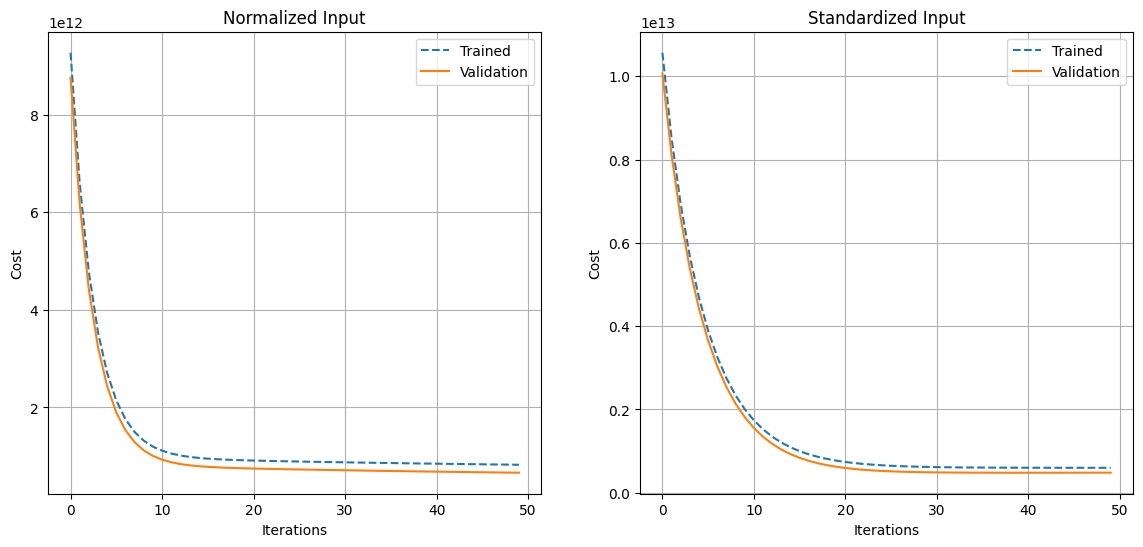

Final validation cost for normalization: 6.615e+11
Final validation cost for standardization: 4.821e+11
Normalization cost was higher than standardization by: 1.794e+11
Normalized - Training Cost: 8.247e+11, Validation Cost: 6.615e+11, Difference: 1.633e+11
Standardized - Training Cost: 5.987e+11, Validation Cost: 4.821e+11, Difference: 1.166e+11


In [ ]:
# CREATE THETAS
thetas = np.zeros(NUM_FEATURES_B + 1) # +1 for bias column
thetas = thetas.reshape(-1,1)
normThetas = thetas.copy()
stdThetas = thetas.copy()

# RESHAPE INTO NP ARRAY COLUMN VECTORS
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

# DEFINE ALPHA AND ITERATIONS
NORM_ALPHA = 0.07
NORM_ITERATIONS = 50
STD_ALPHA = 0.1
STD_ITERATIONS = 50

# TRAIN MODELS
normThetas, normCostHistory, validationCostForNorm = Gradient_Descent_With_Validation(normX_train, y_train, normX_test, y_test, normThetas, NORM_ALPHA, NORM_ITERATIONS)
stdThetas, stdCostHistory, validationCostForStd = Gradient_Descent_With_Validation(stdX_train, y_train, stdX_test, y_test, stdThetas, STD_ALPHA, STD_ITERATIONS)

# PLOT VALIDATION OF BOTH TRIALS (NORMALIZED AND STANDARDIZED) SIDE BY SIDE
plt.figure(figsize=(14, 6))

# NORMALIZATION
plt.subplot(1, 2, 1)
plt.plot(normCostHistory, label='Trained', linestyle='--')
plt.plot(validationCostForNorm, label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Normalized Input')
plt.legend()
plt.grid(True)

# STANDARDIZATION
plt.subplot(1, 2, 2)
plt.plot(stdCostHistory, label='Trained', linestyle='--')
plt.plot(validationCostForStd, label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Standardized Input')
plt.legend()
plt.grid(True)

plt.show()

# FORMAT AND DISPLAY FINAL VALIDATION COSTS IN SCIENTIFIC NOTATION
print("Final validation cost for normalization: {:.3e}".format(validationCostForNorm[NORM_ITERATIONS - 1]))
print("Final validation cost for standardization: {:.3e}".format(validationCostForStd[STD_ITERATIONS - 1]))
print("Normalization cost was higher than standardization by: {:.3e}".format(validationCostForNorm[NORM_ITERATIONS - 1] - validationCostForStd[STD_ITERATIONS - 1]))

# FIND DIFFERENCE IN COST BETWEEN TRAINING AND VALIDATION
# NORMALIZATION
train_final_norm_2 = normCostHistory[NORM_ITERATIONS - 1]
val_final_norm_2 = validationCostForNorm[NORM_ITERATIONS - 1]
print("Normalized - Training Cost: {:.3e}, Validation Cost: {:.3e}, Difference: {:.3e}".format(
    train_final_norm_2, val_final_norm_2, abs(train_final_norm_2 - val_final_norm_2)))

# STANDARDIZATION
train_final_std_2 = stdCostHistory[STD_ITERATIONS - 1]
val_final_std_2 = validationCostForStd[STD_ITERATIONS - 1]
print("Standardized - Training Cost: {:.3e}, Validation Cost: {:.3e}, Difference: {:.3e}".format(
    train_final_std_2, val_final_std_2, abs(train_final_std_2 - val_final_std_2)))

Test set cost: [1.55065386e+12]
Test set cost: [1.55065386e+12]


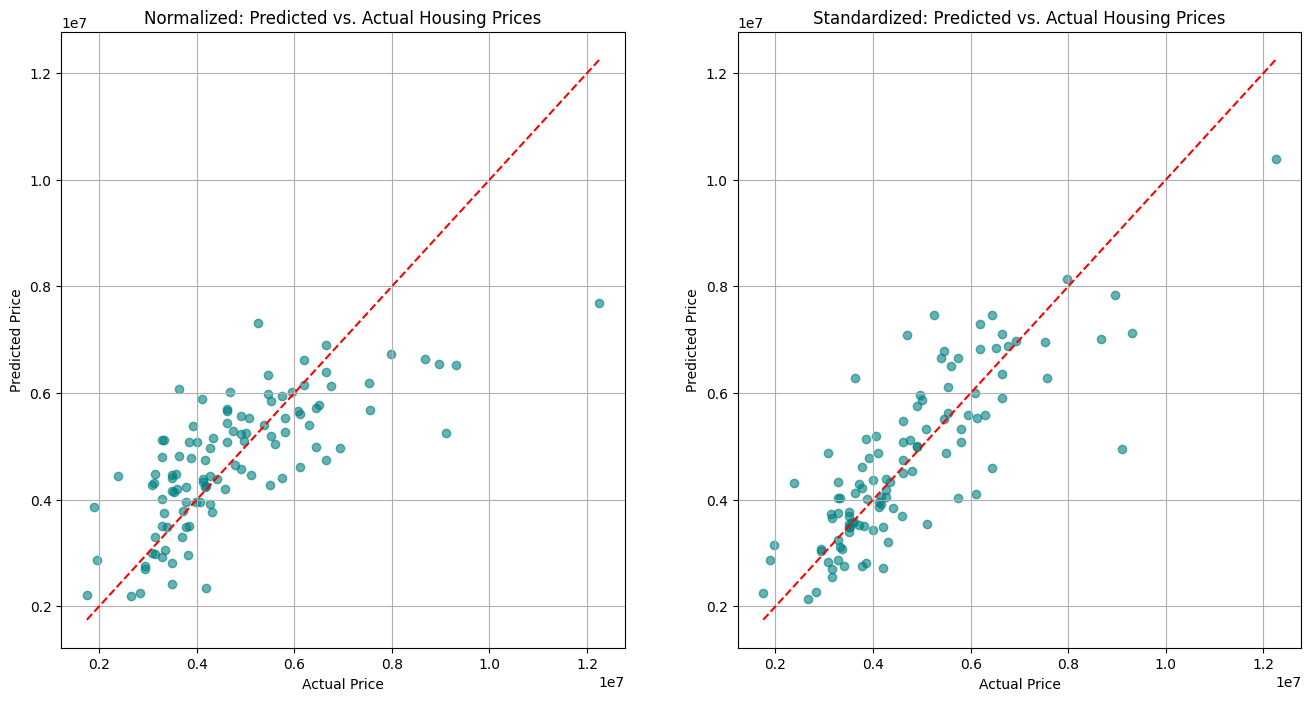

In [ ]:
# TEST ON VALIDATION DATA FOR NORMALIZATION
normY_pred = normX_test.dot(normThetas)
normTest_cost = Compute_Cost(normX_test, y_test, normThetas) # This gives final cost, not a history of it
print("Test set cost:", test_cost)

# TEST ON VALIDATION DATA FOR STANDARDIZATION
stdY_pred = stdX_test.dot(stdThetas)
stdTest_cost = Compute_Cost(stdX_test, y_test, stdThetas) # This gives final cost, not a history of it
print("Test set cost:", test_cost)

# VISUALIZE PERFORMANCE FOR NORMALIZATION AND STANDARDIZATION
plt.figure(figsize=(16, 8))

# NORMALIZATION
plt.subplot(1, 2, 1)
plt.scatter(y_test, normY_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Normalized: Predicted vs. Actual Housing Prices')
plt.grid(True)

# STANDARDIZATION
plt.subplot(1, 2, 2)
plt.scatter(y_test, stdY_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Standardized: Predicted vs. Actual Housing Prices')
plt.grid(True)

plt.show()

While both normalization and standardization achieved an appropriate convergence, standardization performed slightly better. This was due to the tighter gap between the training and validation loss as well as having a lower overall loss than normalization.

# Problem 3a

In [ ]:
# ISOLATE DESIRED FEATURES FOR PROBLEM 3a
# FEATURES: AREA, BEDROOMS, BATHROOMS, STORIES, PARKING
X_3a = df[featuresForA]

# ISOLATE TARGET VARIABLE
y_3a = df['price']

# SPLIT DATA INTO TRAINING AND VALIDATION SET
X_train, X_test, y_train, y_test = train_test_split(X_3a, y_3a, test_size=0.2, random_state=0)

# CREATE SCALER OBJECTS
normalScaler = MinMaxScaler()
standardScaler = StandardScaler()

# NORMALIZE DATA (RETURNS NP ARRAY)
normalScaler.fit(X_train)
normX_train = normalScaler.transform(X_train)
normX_test = normalScaler.transform(X_test)

# STANDARDIZE DATA (RETURNS NP ARRAY)
standardScaler.fit(X_train)
stdX_train = standardScaler.transform(X_train)
stdX_test = standardScaler.transform(X_test)

# CONVERT BACK TO DATAFRAME TO ADD BIAS COLUMN
normX_train = pd.DataFrame(normX_train, columns=X_train.columns)
normX_test = pd.DataFrame(normX_test, columns=X_test.columns)
stdX_train = pd.DataFrame(stdX_train, columns=X_train.columns)
stdX_test = pd.DataFrame(stdX_test, columns=X_test.columns)

# ADD INTERCEPT (BIAS) COLUMN TO FEATURE DATA
normX_train.insert(0, 'bias', 1)
normX_test.insert(0, 'bias', 1)
stdX_train.insert(0, 'bias', 1)
stdX_test.insert(0, 'bias', 1)

# CONVERT BACK TO NP ARRAYS
normX_train = np.array(normX_train)
normX_test = np.array(normX_test)
stdX_train = np.array(stdX_train)
stdX_test = np.array(stdX_test)

In [ ]:
# FUNCTION TO GET PLOTTABLE COST HISTORY OF TEST DATA USED TO VALIDATE TRAINED MODEL (ADJUSTED FOR REGULARIZATION)
def Gradient_Descent_Regularized(x_train, y_train, x_val, y_val, theta, alpha, iterations, lambdaReg):
    m = len(x_train)
    trainCostHistory = np.zeros(iterations)
    testCostHistory = np.zeros(iterations)

    for i in range(iterations):
        predictions = x_train.dot(theta)
        errors = predictions - y_train
        regTerm = (lambdaReg / m) * theta
        regTerm[0] = 0 # Don't regularize bias column
        sumDelta = (alpha / m) * x_train.transpose().dot(errors) + regTerm
        theta = theta - sumDelta

        trainCostHistory[i] = Compute_Cost(x_train, y_train, theta).item()
        testCostHistory[i] = Compute_Cost(x_val, y_val, theta).item()

    return theta, trainCostHistory, testCostHistory

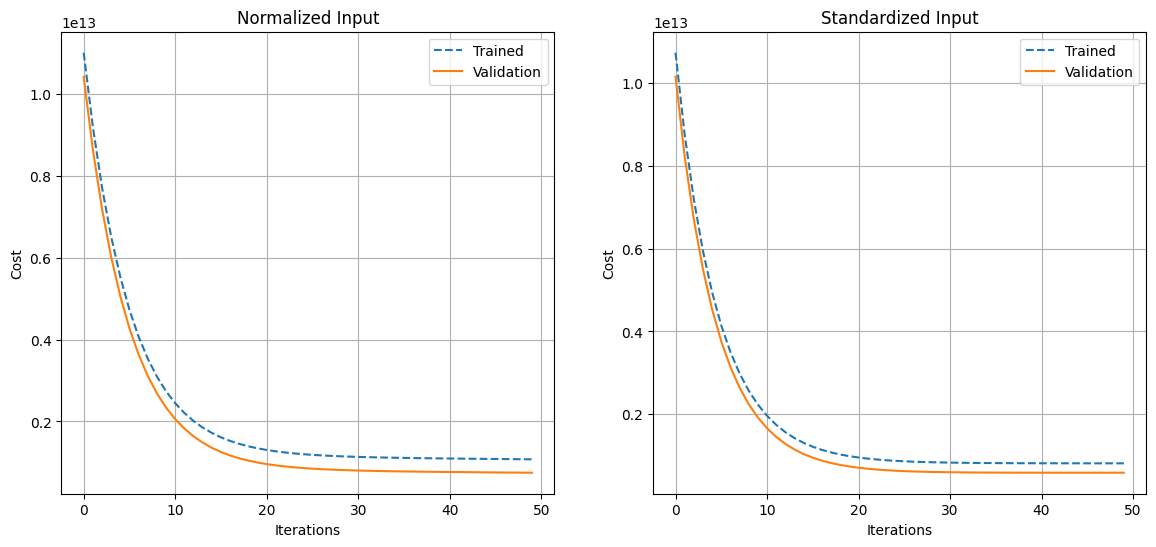

Final validation cost for normalization: 7.474e+11
Final validation cost for standardization: 5.866e+11
Normalization cost was higher than standardization by: 1.607e+11
Normalized - Training Cost: 1.075e+12, Validation Cost: 7.474e+11, Difference: 3.280e+11
Standardized - Training Cost: 8.134e+11, Validation Cost: 5.866e+11, Difference: 2.268e+11


In [ ]:
# CREATE THETAS
thetas = np.zeros(NUM_FEATURES_A + 1) # +1 for bias column
thetas = thetas.reshape(-1,1)
normThetas = thetas.copy()
stdThetas = thetas.copy()

# RESHAPE INTO NP ARRAY COLUMN VECTORS
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

# DEFINE ALPHA, ITERATIONS, AND LAMBDA
NORM_ALPHA = 0.07
NORM_ITERATIONS = 50
STD_ALPHA = 0.1
STD_ITERATIONS = 50
NORM_LAMBDA = 0.01
STD_LAMBDA = 0.01

# TRAIN MODELS
normThetas, normCostHistory, validationCostForNorm = Gradient_Descent_Regularized(normalX_train, y_train, normalX_test, y_test, normThetas, NORM_ALPHA, NORM_ITERATIONS, NORM_LAMBDA)
stdThetas, stdCostHistory, validationCostForStd = Gradient_Descent_Regularized(stdX_train, y_train, stdX_test, y_test, stdThetas, STD_ALPHA, STD_ITERATIONS, STD_LAMBDA)

# PLOT VALIDATION OF BOTH TRIALS (NORMALIZED AND STANDARDIZED) SIDE BY SIDE
plt.figure(figsize=(14, 6))

# 🔹 NORMALIZATION
plt.subplot(1, 2, 1)
plt.plot(normCostHistory, label='Trained', linestyle='--')
plt.plot(validationCostForNorm, label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Normalized Input')
plt.legend()
plt.grid(True)

# STANDARDIZATION
plt.subplot(1, 2, 2)
plt.plot(stdCostHistory, label='Trained', linestyle='--')
plt.plot(validationCostForStd, label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Standardized Input')
plt.legend()
plt.grid(True)

plt.show()

# FORMAT AND DISPLAY FINAL VALIDATION COSTS IN SCIENTIFIC NOTATION
print("Final validation cost for normalization: {:.3e}".format(validationCostForNorm[NORM_ITERATIONS - 1]))
print("Final validation cost for standardization: {:.3e}".format(validationCostForStd[STD_ITERATIONS - 1]))
print("Normalization cost was higher than standardization by: {:.3e}".format(validationCostForNorm[NORM_ITERATIONS - 1] - validationCostForStd[STD_ITERATIONS - 1]))

# FIND DIFFERENCE BETWEEN TRAINING AND VALIDATION
# NORMALIZATION
train_final_norm_3 = normCostHistory[NORM_ITERATIONS - 1]
val_final_norm_3 = validationCostForNorm[NORM_ITERATIONS - 1]
print("Normalized - Training Cost: {:.3e}, Validation Cost: {:.3e}, Difference: {:.3e}".format(
    train_final_norm_3, val_final_norm_3, abs(train_final_norm_3 - val_final_norm_3)))

# STANDARDIZATION
train_final_std_3 = stdCostHistory[STD_ITERATIONS - 1]
val_final_std_3 = validationCostForStd[STD_ITERATIONS - 1]
print("Standardized - Training Cost: {:.3e}, Validation Cost: {:.3e}, Difference: {:.3e}".format(
    train_final_std_3, val_final_std_3, abs(train_final_std_3 - val_final_std_3)))

Test set cost: [1.55065386e+12]
Test set cost: [1.55065386e+12]


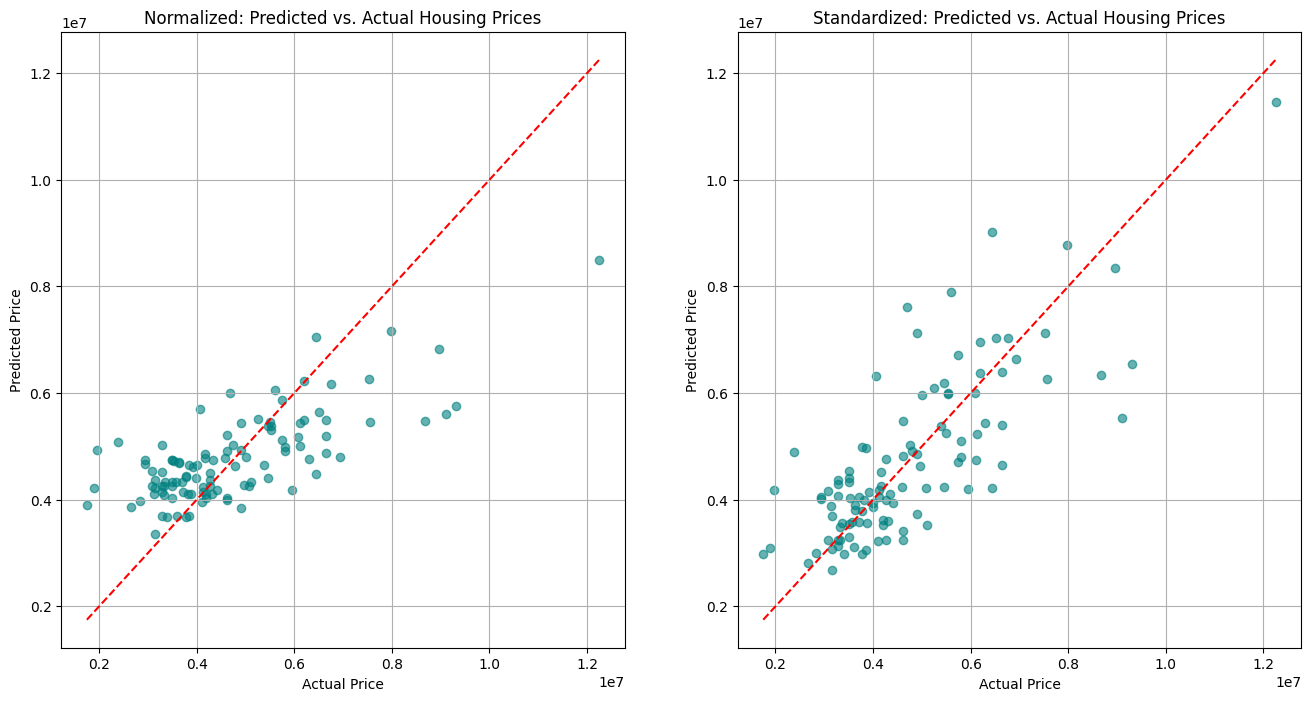

In [ ]:
# TEST ON VALIDATION DATA FOR NORMALIZATION
normY_pred = normX_test.dot(normThetas)
normTest_cost = Compute_Cost(normX_test, y_test, normThetas) # This gives final cost, not a history of it
print("Test set cost:", test_cost)

# TEST ON VALIDATION DATA FOR STANDARDIZATION
stdY_pred = stdX_test.dot(stdThetas)
stdTest_cost = Compute_Cost(stdX_test, y_test, stdThetas) # This gives final cost, not a history of it
print("Test set cost:", test_cost)

# VISUALIZE PERFORMANCE FOR NORMALIZATION AND STANDARDIZATION
plt.figure(figsize=(16, 8))

# NORMALIZATION
plt.subplot(1, 2, 1)
plt.scatter(y_test, normY_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Normalized: Predicted vs. Actual Housing Prices')
plt.grid(True)

# STANDARDIZATION
plt.subplot(1, 2, 2)
plt.scatter(y_test, stdY_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Standardized: Predicted vs. Actual Housing Prices')
plt.grid(True)

plt.show()

# Problem 3b

In [ ]:
# ISOLATE DESIRED FEATURES FOR PROBLEM 3b
# FEATURES: AREA, BEDROOMS, BATHROOMS, STORIES, PARKING
X_3b = df[featuresForB]
NUM_FEATURES_B = len(featuresForB)
X_3b = X_3b.replace({'yes': 1, 'no': 0})

# ISOLATE TARGET VARIABLE
y_3b = df['price']

# SPLIT DATA INTO TRAINING AND VALIDATION SET
X_train, X_test, y_train, y_test = train_test_split(X_3b, y_3b, test_size=0.2, random_state=0)

# CREATE SCALER OBJECTS
normalScaler = MinMaxScaler()
standardScaler = StandardScaler()

# NORMALIZE DATA (RETURNS NP ARRAY)
normalScaler.fit(X_train)
normX_train = normalScaler.transform(X_train)
normX_test = normalScaler.transform(X_test)

# STANDARDIZE DATA (RETURNS NP ARRAY)
standardScaler.fit(X_train)
stdX_train = standardScaler.transform(X_train)
stdX_test = standardScaler.transform(X_test)

# CONVERT BACK TO DATAFRAME TO ADD BIAS COLUMN
normX_train = pd.DataFrame(normX_train, columns=X_train.columns)
normX_test = pd.DataFrame(normX_test, columns=X_test.columns)
stdX_train = pd.DataFrame(stdX_train, columns=X_train.columns)
stdX_test = pd.DataFrame(stdX_test, columns=X_test.columns)

# ADD INTERCEPT (BIAS) COLUMN TO FEATURE DATA
normX_train.insert(0, 'bias', 1)
normX_test.insert(0, 'bias', 1)
stdX_train.insert(0, 'bias', 1)
stdX_test.insert(0, 'bias', 1)

# CONVERT BACK TO NP ARRAYS
normX_train = np.array(normX_train)
normX_test = np.array(normX_test)
stdX_train = np.array(stdX_train)
stdX_test = np.array(stdX_test)

<ipython-input-439-55c58accbee1>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_3b = X_3b.replace({'yes': 1, 'no': 0})


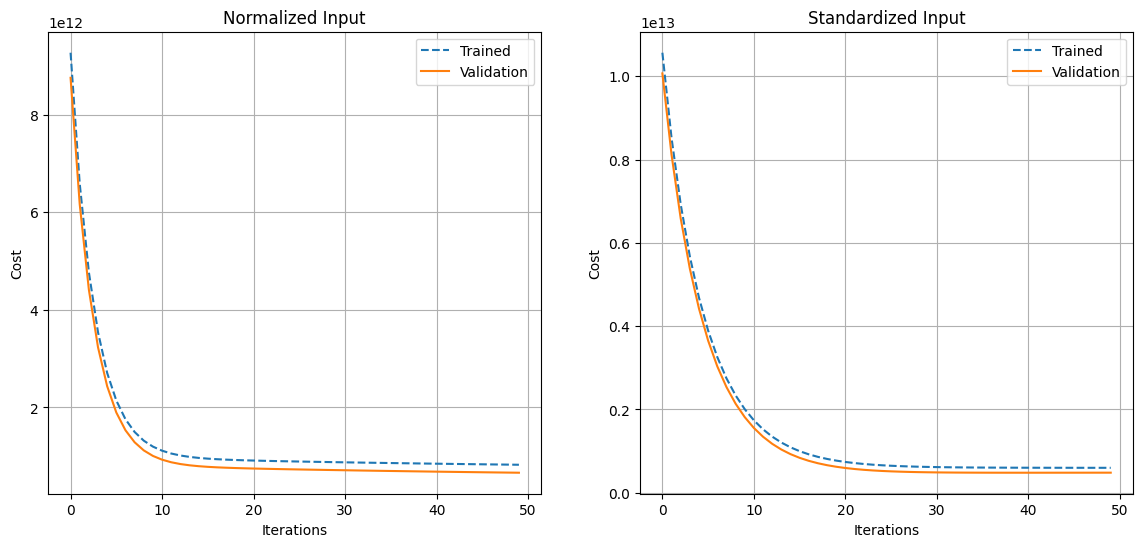

Final validation cost for normalization: 6.615e+11
Final validation cost for standardization: 4.820e+11
Normalization cost was higher than standardization by: 1.795e+11
Normalized - Training Cost: 8.248e+11, Validation Cost: 6.615e+11, Difference: 1.633e+11
Standardized - Training Cost: 5.987e+11, Validation Cost: 4.820e+11, Difference: 1.166e+11


In [ ]:
# CREATE THETAS
thetas = np.zeros(NUM_FEATURES_B + 1) # +1 for bias column
thetas = thetas.reshape(-1,1)
normThetas = thetas.copy()
stdThetas = thetas.copy()

# RESHAPE INTO NP ARRAY COLUMN VECTORS
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

# DEFINE ALPHA, ITERATIONS, AND LAMBDA
NORM_ALPHA = 0.07
NORM_ITERATIONS = 50
STD_ALPHA = 0.1
STD_ITERATIONS = 50
NORM_LAMBDA = 0.01
STD_LAMBDA = 0.01

# TRAIN MODELS
normThetas, normCostHistory, validationCostForNorm = Gradient_Descent_Regularized(normX_train, y_train, normX_test, y_test, normThetas, NORM_ALPHA, NORM_ITERATIONS, NORM_LAMBDA)
stdThetas, stdCostHistory, validationCostForStd = Gradient_Descent_Regularized(stdX_train, y_train, stdX_test, y_test, stdThetas, STD_ALPHA, STD_ITERATIONS, STD_LAMBDA)

# PLOT VALIDATION OF BOTH TRIALS (NORMALIZED AND STANDARDIZED) SIDE BY SIDE
plt.figure(figsize=(14, 6))

# 🔹 NORMALIZATION
plt.subplot(1, 2, 1)
plt.plot(normCostHistory, label='Trained', linestyle='--')
plt.plot(validationCostForNorm, label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Normalized Input')
plt.legend()
plt.grid(True)

# STANDARDIZATION
plt.subplot(1, 2, 2)
plt.plot(stdCostHistory, label='Trained', linestyle='--')
plt.plot(validationCostForStd, label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Standardized Input')
plt.legend()
plt.grid(True)

plt.show()

# FORMAT AND DISPLAY FINAL VALIDATION COSTS IN SCIENTIFIC NOTATION
print("Final validation cost for normalization: {:.3e}".format(validationCostForNorm[NORM_ITERATIONS - 1]))
print("Final validation cost for standardization: {:.3e}".format(validationCostForStd[STD_ITERATIONS - 1]))
print("Normalization cost was higher than standardization by: {:.3e}".format(validationCostForNorm[NORM_ITERATIONS - 1] - validationCostForStd[STD_ITERATIONS - 1]))

# FIND DIFFERENCE BETWEEN TRAINING AND VALIDATION
# NORMALIZATION
train_final_norm_3 = normCostHistory[NORM_ITERATIONS - 1]
val_final_norm_3 = validationCostForNorm[NORM_ITERATIONS - 1]
print("Normalized - Training Cost: {:.3e}, Validation Cost: {:.3e}, Difference: {:.3e}".format(
    train_final_norm_3, val_final_norm_3, abs(train_final_norm_3 - val_final_norm_3)))

# STANDARDIZATION
train_final_std_3 = stdCostHistory[STD_ITERATIONS - 1]
val_final_std_3 = validationCostForStd[STD_ITERATIONS - 1]
print("Standardized - Training Cost: {:.3e}, Validation Cost: {:.3e}, Difference: {:.3e}".format(
    train_final_std_3, val_final_std_3, abs(train_final_std_3 - val_final_std_3)))

Test set cost: [1.55065386e+12]
Test set cost: [1.55065386e+12]


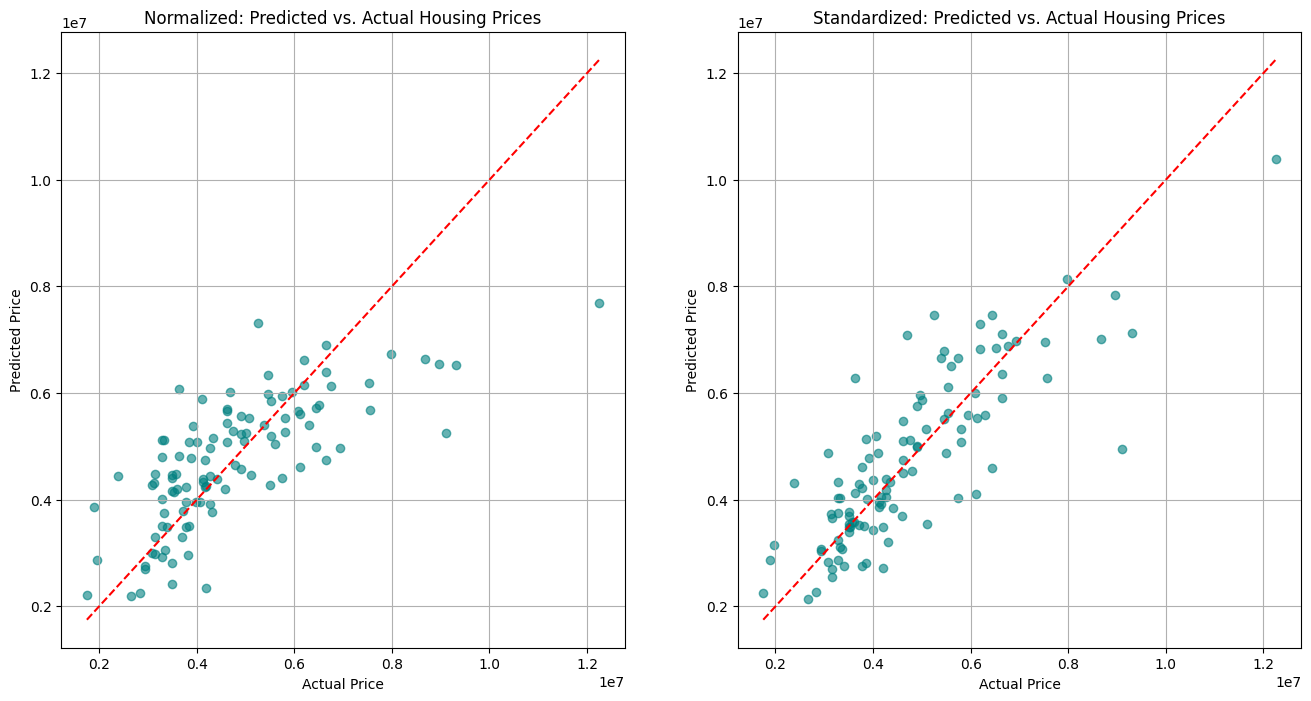

In [ ]:
# TEST ON VALIDATION DATA FOR NORMALIZATION
normY_pred = normX_test.dot(normThetas)
normTest_cost = Compute_Cost(normX_test, y_test, normThetas) # This gives final cost, not a history of it
print("Test set cost:", test_cost)

# TEST ON VALIDATION DATA FOR STANDARDIZATION
stdY_pred = stdX_test.dot(stdThetas)
stdTest_cost = Compute_Cost(stdX_test, y_test, stdThetas) # This gives final cost, not a history of it
print("Test set cost:", test_cost)

# VISUALIZE PERFORMANCE FOR NORMALIZATION AND STANDARDIZATION
plt.figure(figsize=(16, 8))

# NORMALIZATION
plt.subplot(1, 2, 1)
plt.scatter(y_test, normY_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Normalized: Predicted vs. Actual Housing Prices')
plt.grid(True)

# STANDARDIZATION
plt.subplot(1, 2, 2)
plt.scatter(y_test, stdY_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Standardized: Predicted vs. Actual Housing Prices')
plt.grid(True)

plt.show()